The true mean of the parent population is: 3.50
Processing sample size n=2...
Processing sample size n=5...
Processing sample size n=30...
Processing sample size n=100...
Simulation complete. Showing plot...


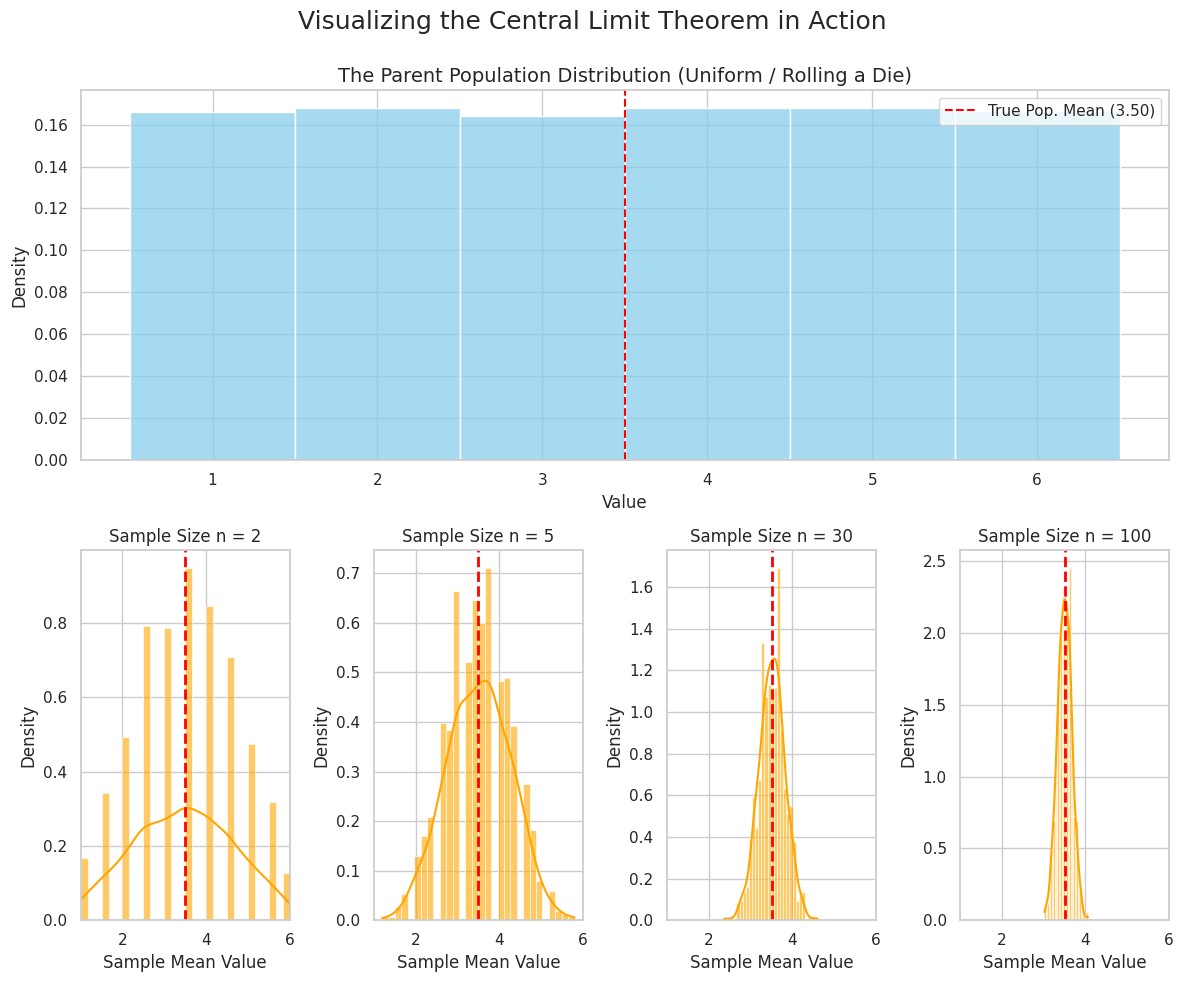

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I like setting a seaborn theme just to make the matplotlib plots look a little nicer by default.
sns.set_theme(style="whitegrid")

# ==========================================
# Configuration
# ==========================================
# To make the results reproducible, I'm setting a seed for the random number generator.
np.random.seed(42)

# The size of the total "parent" population we are drawing from.
POPULATION_SIZE = 100000

# How many times we will draw a sample and calculate its mean.
NUMBER_OF_SAMPLES = 1000 # i.e., we will generate 1000 different averages.

# The different sample sizes (n) I want to test to show the progression of the theorem.
# We expect small sizes (n=2) to look messy, and larger sizes (n=30+) to look normal.
SAMPLE_SIZES_TO_TEST = [2, 5, 30, 100]


# ==========================================
# 1. Generating the "Parent" Population
# ==========================================
# To prove the CLT works, I need to start with a population that is definitely
# NOT normally distributed. I'm choosing a uniform distribution.
# Think of this like rolling a fair 6-sided die 100,000 times.
# Every number from 1 to 6 has an equal chance of appearing.
parent_population = np.random.randint(1, 7, POPULATION_SIZE)

# Let's calculate the true mean of the whole population for comparison later.
# For a D6 die, this should be close to 3.5.
true_population_mean = np.mean(parent_population)
print(f"The true mean of the parent population is: {true_population_mean:.2f}")


# ==========================================
# 2. The Sampling Function
# ==========================================
def generate_sample_means(population, sample_size, num_samples):
    """
    This function implements the core logic of the simulation.
    It repeatedly draws random samples of a specific size from the population
    and calculates the mean of that sample.
    """
    means = []
    for _ in range(num_samples):
        # Draw 'n' random choices from the parent population with replacement.
        # 'n' here is the current sample_size.
        sample = np.random.choice(population, size=sample_size, replace=True)

        # Calculate the average of just this specific sample.
        sample_mean = np.mean(sample)

        # Store it.
        means.append(sample_mean)

    # Return the list of 1000 averages we calculated.
    return np.array(means)


# ==========================================
# 3. Visualization setup
# ==========================================
# I'm creating a figure with subplots so we can see everything side-by-side.
# The layout is 1 row for the parent pop, and 1 row for the 4 sample tests.
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 4)

# Top plot spanning all columns
ax_parent = fig.add_subplot(gs[0, :])

# Bottom row plots for different sample sizes
ax_samples = [fig.add_subplot(gs[1, i]) for i in range(4)]


# ==========================================
# 4. Plotting the Parent Population
# ==========================================
# This visualizes our starting point: the uniform distribution (the die rolls).
sns.histplot(parent_population, bins=6, stat='density', ax=ax_parent, color='skyblue', discrete=True)
ax_parent.set_title("The Parent Population Distribution (Uniform / Rolling a Die)", fontsize=14)
ax_parent.set_xlabel("Value")
ax_parent.set_ylabel("Density")
# Adding a line for the true mean
ax_parent.axvline(true_population_mean, color='red', linestyle='--', label=f'True Pop. Mean ({true_population_mean:.2f})')
ax_parent.legend()


# ==========================================
# 5. Running the Simulation Loop
# ==========================================
# Now I loop through the different sample sizes defined in the config [2, 5, 30, 100]
for i, n in enumerate(SAMPLE_SIZES_TO_TEST):
    print(f"Processing sample size n={n}...")

    # Generate the 1000 sample means for this specific 'n'
    sample_means = generate_sample_means(parent_population, n, NUMBER_OF_SAMPLES)

    # Select the appropriate subplot axis
    ax = ax_samples[i]

    # Plot histogram of the sample means.
    # Notice I'm adding kde=True. This draws the Kernel Density Estimate line,
    # which helps visualize the "shape" of the distribution.
    sns.histplot(sample_means, bins=30, stat='density', kde=True, ax=ax, color='orange', alpha=0.6)

    # Add vertical line for the true population mean again to show how centered the new curve is.
    ax.axvline(true_population_mean, color='red', linestyle='--', linewidth=2)

    # Formatting the subplot
    ax.set_title(f"Sample Size n = {n}", fontsize=12)
    ax.set_xlabel("Sample Mean Value")
    ax.set_ylabel("Density")
    # I'm locking the x-axis limits so it's easier to compare plots visually.
    ax.set_xlim(1, 6)

# Finalizing the layout
plt.suptitle("Visualizing the Central Limit Theorem in Action", fontsize=18, y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.9) # Adjust top to make room for the main title

print("Simulation complete. Showing plot...")
plt.show()